In [1]:
import sys
import xlrd
from pandas import read_csv

In [2]:
with open("tubedata.csv", "r") as f:
    data = read_csv(f, header = None)
    st1 = data[0].tolist()
    
    # regularization, remove "" and extra space
    for i in range(1,6):
        if i !=3:
            data[i] = data[i].str.replace(" \"", '')
            data[i] = data[i].str.replace("\"", '')

    
    st2 = data[1].tolist()
    
    lines = data[2]
    lineset = set(lines)
    
    zone1 = data[4]
    zone1set = set(zone1)
    zone2 = data[5]
    
    stset1 = set(st1)
    stset2 = set(st2)
    
    sto = st1+st2
    #get all unique station
    stt = set(sto)
    
    print("total stations:", len(stt))
    

total stations: 271


In [3]:
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
nx_net = nx.MultiGraph()
#add nodes 
nx_net.add_nodes_from(stt)

In [5]:
#inital nodes attributes with Line, Zone1 Zone2
for station in stt:
    nx_net.nodes[station]['Line'] = []
    nx_net.nodes[station]['Zone1'] = []
    nx_net.nodes[station]['Zone2'] = []

In [6]:
#add attributes with tag
def addatt(node, att, attag):
    if att not in nx_net.nodes[node][attag]:
        nx_net.nodes[node][attag].append(att)
        
for i in range(len(st1)):
    addatt(st1[i], lines[i], 'Line')
    addatt(st2[i], lines[i], 'Line')
    addatt(st1[i], zone1[i], 'Zone1')
    addatt(st2[i], zone1[i], 'Zone1')
    addatt(st1[i], zone2[i], 'Zone2')
    addatt(st2[i], zone2[i], 'Zone2')

In [7]:
print(nx_net.nodes['Waterloo'])

print(nx_net.nodes['Waterloo']['Line'])

print(nx_net.nodes['Waterloo']['Zone1'])

{'Line': ['Bakerloo', 'Jubilee', 'Northern', 'Waterloo & City'], 'Zone1': ['1'], 'Zone2': ['0']}
['Bakerloo', 'Jubilee', 'Northern', 'Waterloo & City']
['1']


In [8]:
print(len(nx_net.nodes))

271


In [9]:
edg = zip(data[0], data[1], data[3])
#add weighted edges
nx_net.add_weighted_edges_from(edg)

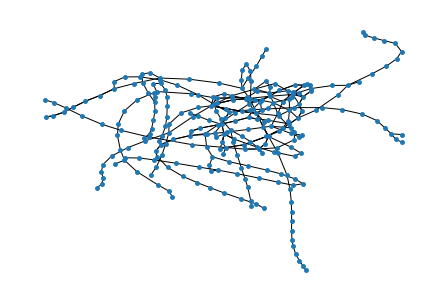

In [10]:
nx.draw(nx_net, with_labels=False, node_size=15, connectionstyle="arc3, rad=0.1")
plt.show()

In [11]:
print(nx_net.number_of_edges())

374


In [12]:
testroute = [("Canada Water", "Stratford"),
            ("New Cross Gate", "Stepney Green"),
            ("Ealing Broadway", "South Kensington"),
            ("Baker Street", "Wembley Park"),
            ("Kenton", "Waterloo"),
            ("Euston", "Victoria"),
            ]

In [13]:
#calculate the time cost of the route
def calcost(R):
    cost = 0.0
    for n in range(len(R) -1):
#         print(R[n])
#         print(nx_net.get_edge_data(R[n],R[n+1])[0]['weight'])
        cost += nx_net.get_edge_data(R[n],R[n+1])[0]['weight']
    return cost


In [14]:

def dfsN(startp, visit, endp,  tmp):
    '''
        @parameter startp: start station
        @parameter visit: visit list to store the visited station
        @parameter endp: destination station
        @parameter tmp: tmp list to store the route so fa
        
    '''
    global route
    B = nx_net.neighbors(startp)
    visit.append(startp)
    if endp == startp:
#         print(tmp)
        route = list(tmp)
#         print(route)
        return 
    
    for next_st in B:
        if next_st not in visit:  
            tmp.append(next_st)
            dfsN(next_st, visit, endp, tmp)
            tmp.remove(next_st)
            
    return 

In [15]:

for start, destin in testroute:
    dfsN(start, [], destin,  [start])
    print(start, "----->", destin)
    print("Expanding length of DFS: " , len(route))
    print("Route length: ", len(route))
    print("Time cost: ", calcost(route))
    print(route)
    print("-"*100)

Canada Water -----> Stratford
Expanding length of DFS:  12
Route length:  12
Time cost:  24.0
['Canada Water', 'Rotherhithe', 'Wapping', 'Shadwell', 'Whitechapel', 'Aldgate East', 'Tower Hill', 'Aldgate', 'Liverpool Street', 'Bethnal Green', 'Mile End', 'Stratford']
----------------------------------------------------------------------------------------------------
New Cross Gate -----> Stepney Green
Expanding length of DFS:  14
Route length:  14
Time cost:  28.0
['New Cross Gate', 'Surrey Quays', 'Canada Water', 'Rotherhithe', 'Wapping', 'Shadwell', 'Whitechapel', 'Aldgate East', 'Tower Hill', 'Aldgate', 'Liverpool Street', 'Bethnal Green', 'Mile End', 'Stepney Green']
----------------------------------------------------------------------------------------------------
Ealing Broadway -----> South Kensington
Expanding length of DFS:  44
Route length:  44
Time cost:  89.0
['Ealing Broadway', 'West Acton', 'North Acton', 'East Acton', 'White City', "Shepherd's Bush", 'Holland Park', 'Not

In [16]:

def bfs(visit, startp, endp):    
    '''
        @parameter visit: visit list to store the visited station
        @parameter startp: start station
        @parameter endp: destination station
    '''

    visit.append(startp)
    queue.append(startp)
    while endp not in queue: 
#         print(queue)
#         print("-"*100)
        m = queue.pop(0) # pop the first node in the queue
#         print(m, " m")
        
        #add children node of the previous node to the queue
        for neighbour in nx_net.neighbors(m):
            if neighbour not in visit:
#                 print(neighbour, "n")
                visit.append(neighbour)
                queue.append(neighbour)
                #keep a dict which stores {current station : previous station}
                cur_route.update({neighbour:m})
                
    print("Expanding length for BFS:", len(cur_route))
    
    backpath(endp, startp, route, cur_route)
    route.insert(0,endp)
    route.reverse()

# store the actual path found by bfs
def backpath(endp, front, route, cur_route):
    if endp == front:
#         route.append(front)
        return 
    pre_st = cur_route[endp]
    route.append(pre_st)
    backpath(pre_st, front, route, cur_route)
    route = route[:-1]
    
for start, destin in testroute:
    visit = [] 
    queue = []
    route = []
    cur_route = {}
    
    print(start, "----->", destin)
    bfs(visit, start, destin)
    print("Route length: ", len(route))
    print("Time cost: ", calcost(route))
    print(route)
    print("-"*100)

Canada Water -----> Stratford
Expanding length for BFS: 39
Route length:  6
Time cost:  15.0
['Canada Water', 'Canary Wharf', 'North Greenwich', 'Canning Town', 'West Ham', 'Stratford']
----------------------------------------------------------------------------------------------------
New Cross Gate -----> Stepney Green
Expanding length for BFS: 26
Route length:  8
Time cost:  14.0
['New Cross Gate', 'Surrey Quays', 'Canada Water', 'Rotherhithe', 'Wapping', 'Shadwell', 'Whitechapel', 'Stepney Green']
----------------------------------------------------------------------------------------------------
Ealing Broadway -----> South Kensington
Expanding length for BFS: 49
Route length:  9
Time cost:  20.0
['Ealing Broadway', 'Ealing Common', 'Acton Town', 'Turnham Green', 'Hammersmith', 'Barons Court', "Earls' Court", 'Gloucester Road', 'South Kensington']
----------------------------------------------------------------------------------------------------
Baker Street -----> Wembley Park
E

In [17]:
import queue as Queue

def ucs(visit, startp, endp): 
    '''
        @parameter visit: visit list to store the visited station
        @parameter startp: start station
        @parameter endp: destination station
    '''
    
    visit.append(startp)
    q.put((0, startp))
    flag = False
    while not flag: 
#         print(queue)
#         print("-"*100)
        m = q.get()
#         print(m[1], " m")
        

        for neighbour in nx_net.neighbors(m[1]):
            if neighbour not in visit:

                visit.append(neighbour)
                #add children node according to the edge weight
                q.put((nx_net.get_edge_data(m[1],neighbour)[0]['weight'],neighbour))

                cur_route.update({neighbour:m[1]})
                if endp == neighbour:
                    flag = True
                
    print("Expanding length for UCS:", len(cur_route))
    backpath(endp, startp, route, cur_route)
    route.insert(0,endp)
    route.reverse()
    
for start, destin in testroute:
    q = Queue.PriorityQueue()
    visit = [] 
    route = []
    cur_route = {}

    print(start, "----->", destin)
    ucs(visit, start, destin)
    print("Route length: ", len(route))
    print("Time cost: ", calcost(route))
    print(route)
    print("-"*100)

Canada Water -----> Stratford
Expanding length for UCS: 126
Route length:  8
Time cost:  14.0
['Canada Water', 'Rotherhithe', 'Wapping', 'Shadwell', 'Whitechapel', 'Stepney Green', 'Mile End', 'Stratford']
----------------------------------------------------------------------------------------------------
New Cross Gate -----> Stepney Green
Expanding length for UCS: 13
Route length:  8
Time cost:  14.0
['New Cross Gate', 'Surrey Quays', 'Canada Water', 'Rotherhithe', 'Wapping', 'Shadwell', 'Whitechapel', 'Stepney Green']
----------------------------------------------------------------------------------------------------
Ealing Broadway -----> South Kensington
Expanding length for UCS: 62
Route length:  17
Time cost:  38.0
['Ealing Broadway', 'West Acton', 'North Acton', 'East Acton', 'White City', "Shepherd's Bush", 'Holland Park', 'Notting Hill Gate', 'Bayswater', 'Paddington', 'Edgware Road', 'Baker Street', 'Bond Street', 'Green Park', 'Hyde Park Corner', 'Knightsbridge', 'South Ken

In [18]:

def ucs_pcost(visit, startp, endp): 
    '''
        ucs with path cost, 
        consider the cost from start station instead of previous station to current station 
        @parameter visit: visit list to store the visited station
        @parameter startp: start station
        @parameter endp: destination station
    '''
    visit.append(startp)
    q.put((0, startp))
    ct.update({startp:0})
    flag = 1
    while flag>0: 
        m = q.get()

        for neighbour in nx_net.neighbors(m[1]):
            if neighbour not in visit:

                visit.append(neighbour)
                cur_route.update({neighbour:m[1]})
                cur_cost = nx_net.get_edge_data(m[1],neighbour)[0]['weight']+ct[cur_route[neighbour]]
                ct.update({neighbour:cur_cost})
                q.put((ct[neighbour],neighbour))

                if endp == neighbour:
                    flag = -1
        flag+=1
                
    print("Expanding length for UCS_pcost:", len(cur_route))
    backpath(endp, startp, route, cur_route)
    route.insert(0,endp)
    route.reverse()
    
for start, destin in testroute:
    q = Queue.PriorityQueue()
    visit = [] 
    route = []
    ct = {}
    cur_route = {}

    print(start, "----->", destin)
    ucs_pcost(visit, start, destin)
    print("Route length: ", len(route))
    print("Time cost: ", calcost(route))
    print(route)
    print("-"*100)

Canada Water -----> Stratford
Expanding length for UCS_pcost: 37
Route length:  8
Time cost:  14.0
['Canada Water', 'Rotherhithe', 'Wapping', 'Shadwell', 'Whitechapel', 'Stepney Green', 'Mile End', 'Stratford']
----------------------------------------------------------------------------------------------------
New Cross Gate -----> Stepney Green
Expanding length for UCS_pcost: 17
Route length:  8
Time cost:  14.0
['New Cross Gate', 'Surrey Quays', 'Canada Water', 'Rotherhithe', 'Wapping', 'Shadwell', 'Whitechapel', 'Stepney Green']
----------------------------------------------------------------------------------------------------
Ealing Broadway -----> South Kensington
Expanding length for UCS_pcost: 54
Route length:  9
Time cost:  20.0
['Ealing Broadway', 'Ealing Common', 'Acton Town', 'Turnham Green', 'Hammersmith', 'Barons Court', "Earls' Court", 'Gloucester Road', 'South Kensington']
--------------------------------------------------------------------------------------------------

In [19]:
# linedict to store all the Lines label
linedict = {}

for line in lineset:
    lstation = []
    for i in range(len(st1)):
        if lines[i]==line:
            lstation.append(st1[i])
            lstation.append(st2[i])
    lstation = set(lstation)
    linedict.update({line:lstation})

print(linedict.keys())

dict_keys(['Central', 'East London', 'Jubilee', 'Waterloo & City', 'Circle', 'Northern', 'Victoria', 'Hammersmith & City', 'District', 'Bakerloo', 'Piccadilly', 'Metropolitan'])


In [20]:
def heuristic(curp, endp, cost):
    '''
        add the information of Zone, and if the two stations are in the same Line
        the final cost = original time cost + sameline cost + difZone cost*5
    '''
    sameline = 3
    for line in nx_net.nodes[curp]['Line']:
        if line in nx_net.nodes[endp]['Line']:
            sameline = 0
            
    curZone = int(nx_net.nodes[curp]['Zone1'][0])
    endZone = int(nx_net.nodes[endp]['Zone1'][0])
    difZone = abs(curZone - endZone)
    
    cost = cost + sameline + difZone*5
    
    return cost

In [21]:
# test heuristic
heuristic("Euston", "Waterloo", 2)

7

In [22]:

def ucs_heuristic(visit, startp, endp): 
    '''
        ucs with heuristic algorithm
        consider the cost with Zone knowledge and line
        @parameter visit: visit list to store the visited station
        @parameter startp: start station
        @parameter endp: destination station
    '''
    visit.append(startp)
    q.put((0, startp))
    ct.update({startp:0})
    flag = 1
    while flag>0: 
        m = q.get()

        for neighbour in nx_net.neighbors(m[1]):
            if neighbour not in visit:

                visit.append(neighbour)
                cur_route.update({neighbour:m[1]})
                #time cost
                cur_cost = nx_net.get_edge_data(m[1],neighbour)[0]['weight']+ct[cur_route[neighbour]]
                #heruitic cost
                ct.update({neighbour:heuristic(neighbour, endp, cur_cost)})
                q.put((ct[neighbour],neighbour))

                if endp == neighbour:
                    flag = -1
        flag+=1
                
    print("Expanding length for UCS_Heuristic:", len(cur_route))
    backpath(endp, startp, route, cur_route)
    route.insert(0,endp)
    route.reverse()
    
for start, destin in testroute:
    q = Queue.PriorityQueue()
    visit = [] 
    route = []
    ct = {}
    cur_route = {}

    print(start, "----->", destin)
    ucs_heuristic(visit, start, destin)
    print("Route length: ", len(route))
    print("Time cost: ", calcost(route))
    print(route)
    print("-"*100)

Canada Water -----> Stratford
Expanding length for UCS_Heuristic: 16
Route length:  6
Time cost:  15.0
['Canada Water', 'Canary Wharf', 'North Greenwich', 'Canning Town', 'West Ham', 'Stratford']
----------------------------------------------------------------------------------------------------
New Cross Gate -----> Stepney Green
Expanding length for UCS_Heuristic: 16
Route length:  8
Time cost:  14.0
['New Cross Gate', 'Surrey Quays', 'Canada Water', 'Rotherhithe', 'Wapping', 'Shadwell', 'Whitechapel', 'Stepney Green']
----------------------------------------------------------------------------------------------------
Ealing Broadway -----> South Kensington
Expanding length for UCS_Heuristic: 35
Route length:  9
Time cost:  20.0
['Ealing Broadway', 'Ealing Common', 'Acton Town', 'Turnham Green', 'Hammersmith', 'Barons Court', "Earls' Court", 'Gloucester Road', 'South Kensington']
----------------------------------------------------------------------------------------------------
Bake